分割の確認： (80, 2) (20, 2) (80,) (20,)
正解率(学習データ) =  1.0
正解率(テストデータ) =  1.0


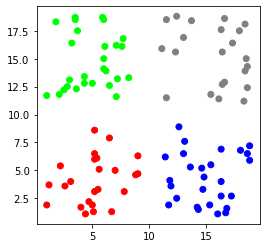

In [2]:
# モジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# データセットのインポート
file=pd.read_csv('input/tree.csv')

# データの割り振り
X=file.iloc[:,0:2]
Y=file.iloc[:,2]

# データセットを学習データ（8割）とテストデータ（2割）に分割（random_stateは0）
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)
# 分割の確認
print('分割の確認：',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# 学習実行
# インスタンスの作成
model = DecisionTreeClassifier(max_depth=2)
# モデルの作成
model.fit(X_train, Y_train)

# 学習データからの予測値
pred_train = model.predict(X_train)
# テストデータからの予測値
pred_test = model.predict(X_test)

# 学習データを用いた分類モデルの評価
print('正解率(学習データ) = ', metrics.accuracy_score(Y_train, pred_train))

# テストデータを用いた分類モデルの評価
print('正解率(テストデータ) = ', metrics.accuracy_score(Y_test, pred_test))

# データセットの図示
plt.figure(figsize=(4,4))
plt.scatter(file.iloc[:,0], file.iloc[:,1], c=file.iloc[:,2], cmap=ListedColormap(['#FF0000', '#0000FF','#00FF00','#808080']))
plt.show()

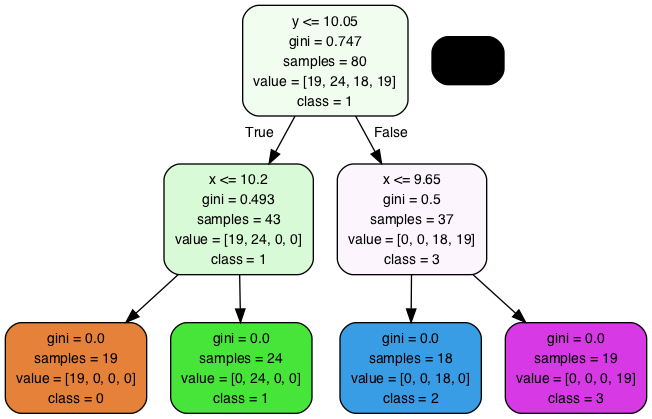

In [3]:
# graphvizで描画(Jupyter Notebookに直接)
import pydot
from sklearn.tree import export_graphviz
from IPython import display

test_feature = ['x', 'y']
test_class = ['0','1','2','3']

dot_str = export_graphviz(
    model.fit(X_train, Y_train), #学習で得られたモデルのコード。
    filled = True, #ノードに色をつけるためのコード。
    rounded = True, #ノードの角を丸くするコード。
    feature_names = test_feature, #説明変数(特徴量)の名前を指定するコード。
    class_names = test_class #目的変数(カテゴリー)の名前を指定するコード。
)

graphs = pydot.graph_from_dot_data(dot_str)
png_data = graphs[0].create_png(prog='dot')
display.display(display.Image(png_data))